# Predykcja i prognozowanie: Regresja liniowa i inne liniowe
   1. Regresja liniowa, zalety, wady, problemy
   2. Support Vector Machine, zalety, wady, problemy
   3. Uczenie modelu
   4. Problem nieliniowy -- co robić, jak żyć?
   
![forecasting](https://i.stack.imgur.com/IQu3m.png)

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
!pip install plotly --upgrade

     |████████████████████████████████| 13.2MB 277kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


## Wczytanie danych

In [ ]:
df = pd.read_csv('https://szymon.bobek.re/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
ddf = df.drop(columns=['id','date','lat','long','zipcode'])

In [ ]:
target = 'price'
features = [c for c in ddf.columns if c != 'price']

In [ ]:
features

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'sqft_living15',
 'sqft_lot15']

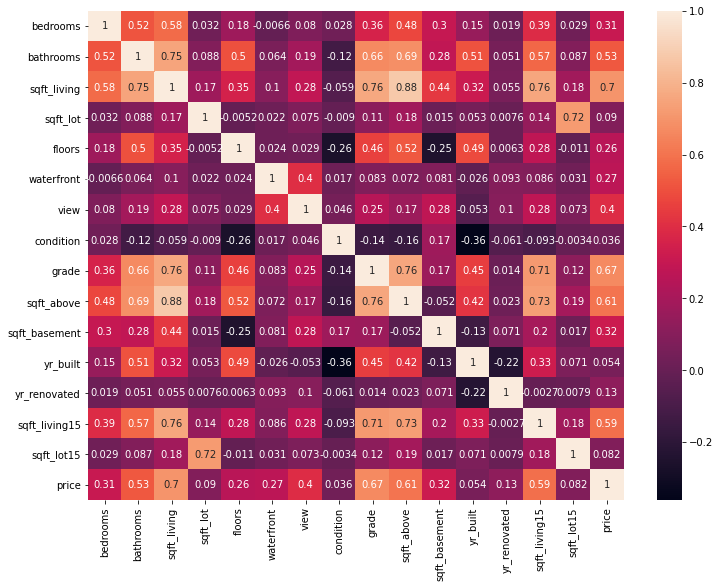

In [ ]:
import seaborn as sns
corr = ddf[features+[target]].corr()
plt.figure( figsize=(12,9))
sns.heatmap(corr, annot=True)

In [ ]:
simple=['sqft_living']

## Uczenie modelu

In [ ]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split

#Podział na train i test
train,test = train_test_split(ddf, test_size=0.33)

In [ ]:
model = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
model.fit(train[simple],train[target])
print(model.score(test[simple],test[target]))


0.503129805093387


In [ ]:
from sklearn.metrics import mean_squared_error,mean_squared_log_error,median_absolute_error,mean_absolute_error
print('MSE: '+str(mean_squared_error(model.predict(test[simple]),test[target])))

MSE: 71481900475.45576


## Wielowymiarowa regresja liniowa

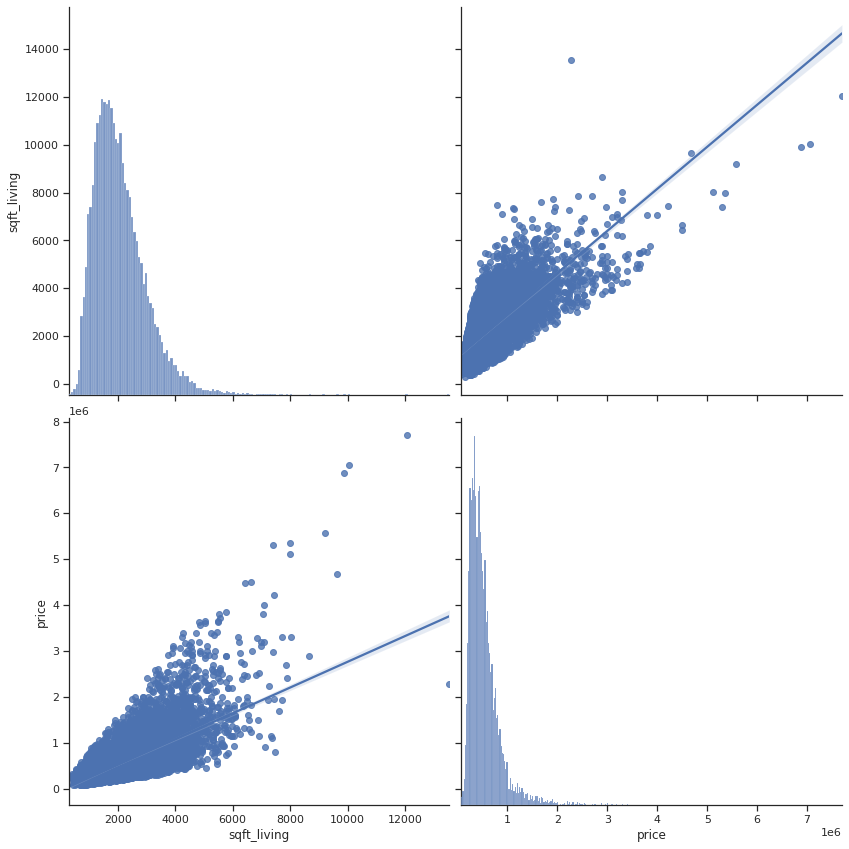

In [ ]:
simple = ['sqft_living']
sns.set(style='ticks')
sns.pairplot(ddf[simple+[target]], kind='reg', diag_kind='hist', height=6, aspect=1)

## Problem nieliniowy -- co robić, jak żyć?
<img src="https://www.mobygames.com/images/shots/l/572920-mario-forever-windows-screenshot-you-have-to-go-through-one.jpg"/>

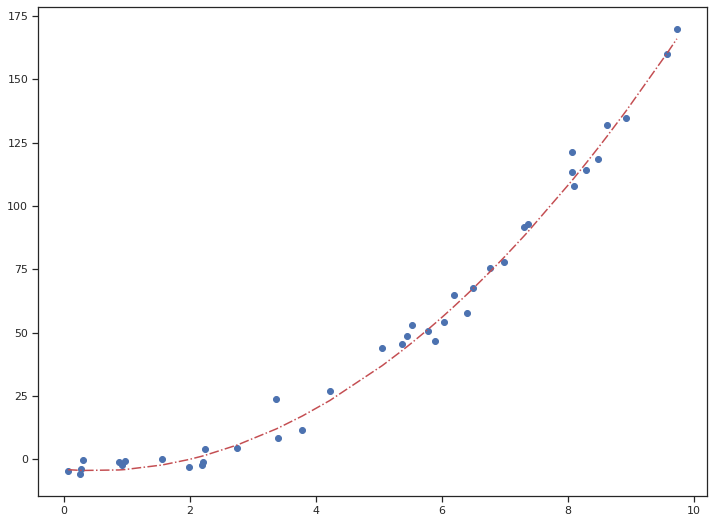

In [ ]:
import math
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model

random.seed(42)
n = 40
x = np.sort(np.array([random.random()*10 for i in range(n)]))
z = [2*i**2-2*i-4 for i in x] #y
e = np.array([random.gauss(0,10.0/2.0) for i in range(n)])
z_orig=z
z = z+e

plt.figure(figsize=(12,9))
plt.scatter(x,z)
plt.plot(x,z_orig,'r-.')
plt.show()

## Nausz model
  * Masz jedną cechę __x__ i wyjście __z__
  * Użyj jak wcześniej LinearRegression

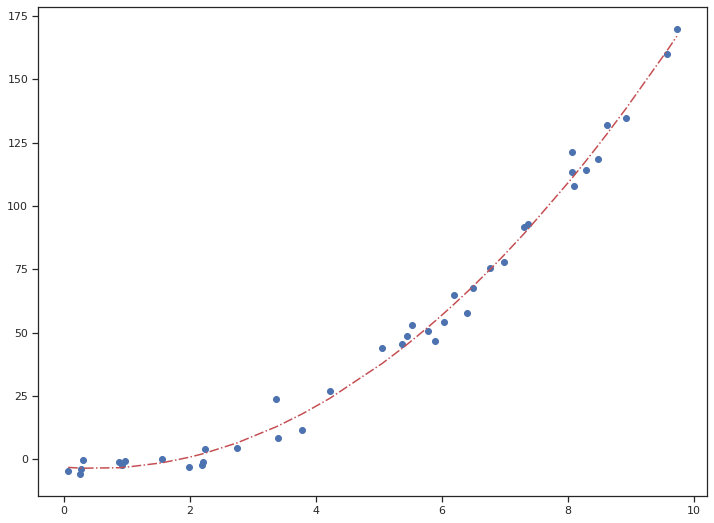

In [ ]:
dfm = pd.DataFrame({'x':x,'z':z, 'x2':x**2})
nm = LinearRegression()
nm.fit(dfm[['x','x2']], dfm['z'])

y_hat = nm.predict(dfm[['x','x2']])

plt.figure(figsize=(12,9))
plt.scatter(x,z)
plt.plot(x,y_hat,'r-.')
plt.show()

## Dodaj cechy

In [ ]:
y = x**2
#np.column_stack((x,y))

In [ ]:
model = LinearRegression()
model.fit(np.column_stack((x,y)),z)
model.coef_

array([-2.02960193,  2.00445128])

In [ ]:
model.intercept_

-3.0979866202908113

In [ ]:
def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
  init_notebook_mode(connected=False)

In [ ]:

data = [(i,j,2*i-2*j-4) for i in range(100) for j in range(10)]
df = pd.DataFrame(data, columns=['x','y','z'])
zdf = df.pivot_table(values='z', index='x', columns='y')

zd = zdf.values#as_matrix()

#import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
enable_plotly_in_cell()

trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)

trace2 = go.Surface(
        z=zd
    )


fig = go.Figure(data=[trace1,trace2])
iplot(fig)

In [ ]:
zz = model.predict(np.column_stack([x,y]))

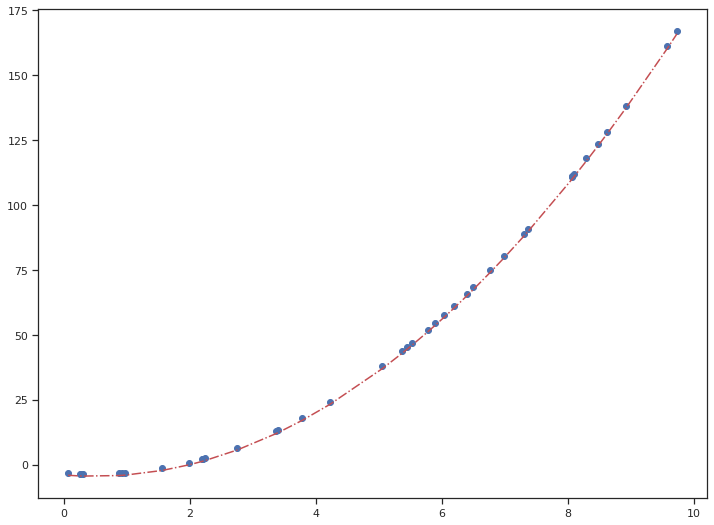

In [ ]:
plt.figure(figsize=(12,9))
plt.scatter(x,zz)
plt.plot(x,z_orig,'r-.')
plt.show()

### CHALLENGE: Wykonaj regresję z dodatkową cechą $sqft\_living^2$ i porównaj wyniki

In [ ]:
ddf_copy = ddf[simple+[target]].copy()

In [ ]:
## tutaj dodaj nową cechę do ddf_copy i utwó©z listę simplec któ©a zawierać będzie cechy (dwie) dla modelu
ddf_copy['sqft_living2']=ddf_copy['sqft_living']**2
simplec=['sqft_living','sqft_living2']

In [ ]:
trainc, testc = train_test_split(ddf_copy, train_size=0.33, random_state=42)

model = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
model.fit(trainc[simplec],trainc[target])
print(model.score(testc[simplec],testc[target]))


0.5357471463943034


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


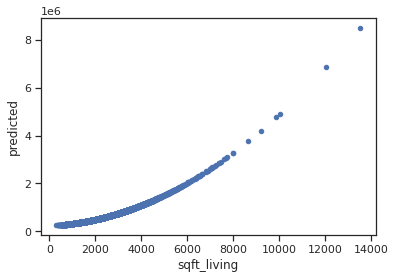

In [ ]:
testc['predicted'] = model.predict(testc[simplec])
testc.plot(x='sqft_living', y='predicted', kind='scatter')


## Co robić gdy wymiarów jest za dużo...
Może okazać się, że budowany model na początku bazuje na kilkunastu cechach, które w skomplikowany sposób zależą od zmiennej targetowej. W takim wypadku możeby użyć PolynomialFeatures wspomaganej przez karę L2

### Polynomial Features i L2

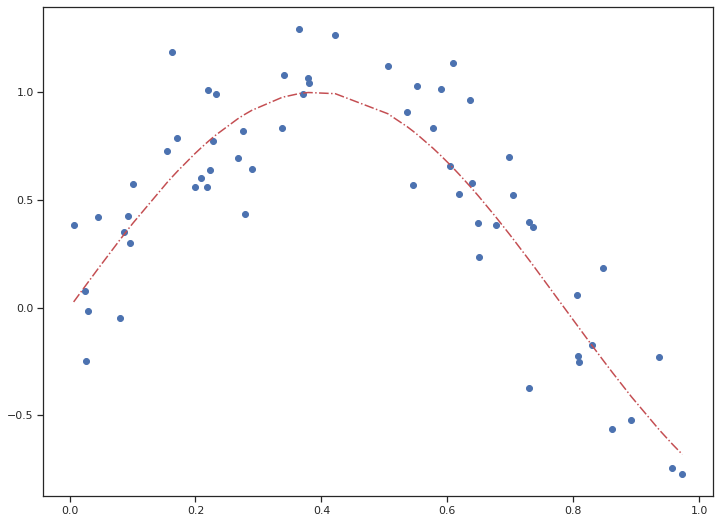

In [ ]:
import math
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model

random.seed(42)
n = 60
x = np.sort(np.array([random.random() for i in range(n)]))
y = [math.sin(4*i) for i in x]
e = np.array([random.gauss(0,1.0/4.0) for i in range(n)])
y_orig=y
y = y+e

plt.figure(figsize=(12,9))
plt.scatter(x,y)
plt.plot(x,y_orig,'r-.')
plt.show()

train = pd.DataFrame({'x':x, 'y':y})

In [ ]:
from sklearn.preprocessing import PolynomialFeatures


deg=14
#deg=4
poly = PolynomialFeatures(deg)

train_poly = poly.fit_transform(train[['x']])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01413040352685524, tolerance: 0.0015791208390161231

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


[ 0.          2.9456046  -0.65152774 -4.25382814 -0.         -0.
  0.          0.          0.          0.          0.          0.59098099
  0.52271522  0.          0.        ]


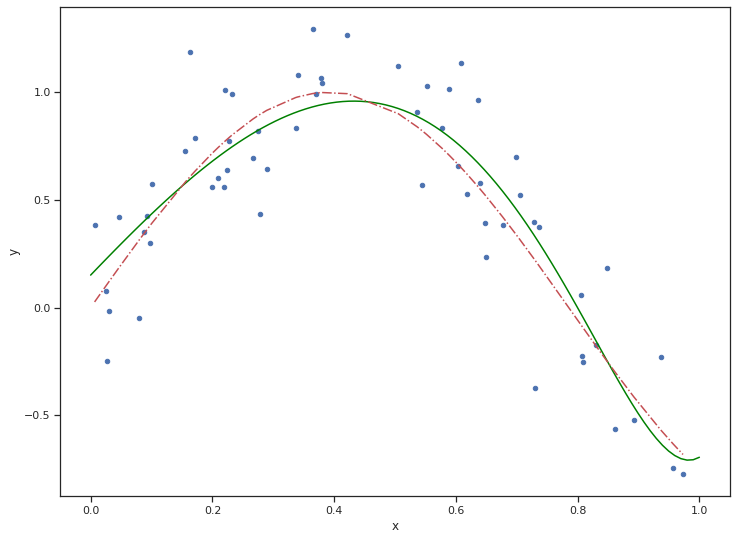

array([ 0.        ,  2.9456046 , -0.65152774, -4.25382814, -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.59098099,  0.52271522,  0.        ,  0.        ])

In [ ]:
#regr = linear_model.LinearRegression()
#regr = linear_model.Ridge (alpha = 0.01)
regr = linear_model.Lasso(alpha = 0.001)
regr.fit(train_poly,y)
theta_0 = regr.intercept_
print(regr.coef_)
xx = np.linspace(0,1,100)
xx_poly=poly.fit_transform(pd.DataFrame({'x':xx}))
yy=regr.predict(xx_poly)


ax=train.plot.scatter(x='x',y='y',figsize=(12,9))
ax.plot(xx,yy,color='green')

plt.plot(x,y_orig,'r-.')
plt.show()
regr.coef_

### How to choose Lambda/alpha?

In [ ]:
from sklearn.preprocessing import PolynomialFeatures


deg=14
#deg=4
poly = PolynomialFeatures(deg)

train_poly = poly.fit_transform(train[['x']])

NameError: ignored

In [ ]:
from sklearn.linear_model import RidgeCV,LassoCV

#regr = linear_model.LinearRegression()
regr = linear_model.RidgeCV (alphas = np.linspace(0.01,1,10),cv=5)
#regr = linear_model.LassoCV(alphas = [0.01])
regr.fit(train_poly,y)
theta_0 = regr.intercept_
print(regr.coef_)
xx = np.linspace(0,1,100)
xx_poly=poly.fit_transform(pd.DataFrame({'x':xx}))
yy=regr.predict(xx_poly)


ax=train.plot.scatter(x='x',y='y',figsize=(12,9))
ax.plot(xx,yy,color='green')

plt.plot(x,y_orig,'r-.')
plt.show()
regr.alpha_

## SVM i kernel

### Wbudowane kernele

In [ ]:
from sklearn import svm
model = svm.SVR(kernel='rbf', C=100)
model.fit(pd.DataFrame({'x':x}),y)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


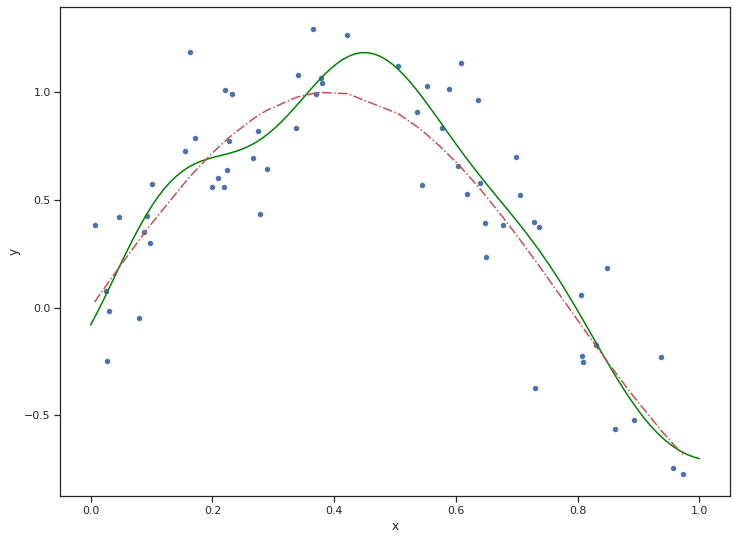

In [ ]:
xx = np.linspace(0,1,100)
yy=model.predict(pd.DataFrame({'x':xx}))


ax=train.plot.scatter(x='x',y='y',figsize=(12,9))
ax.plot(xx,yy,color='green')

plt.plot(x,y_orig,'r-.')
plt.show()

### KernelRidge

In [ ]:
from sklearn.kernel_ridge import KernelRidge
model = KernelRidge(kernel='poly', degree=11, alpha=0.1)
model.fit(pd.DataFrame({'x':x}),y)


KernelRidge(alpha=0.1, coef0=1, degree=11, gamma=None, kernel='poly',
            kernel_params=None)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


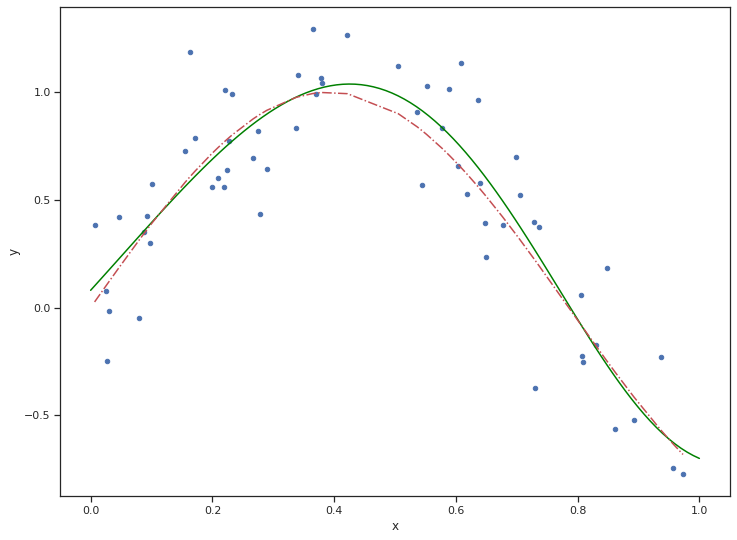

In [ ]:
xx = np.linspace(0,1,100)
yy=model.predict(pd.DataFrame({'x':xx}))


ax=train.plot.scatter(x='x',y='y',figsize=(12,9))
ax.plot(xx,yy,color='green')

plt.plot(x,y_orig,'r-.')
plt.show()

### CHALLENGE: Wykonaj regresję na datasecie z domami wykorzystując PolyFeatures i L2
Zrób kilka eksperymentów i zobacz co wyjdzie najlepiej.
Użyj wszystkich cech numerycznych, poza zipcode, lat i long

## A co jeśli mamy sezonowość i trend?
![forecasting](https://i.stack.imgur.com/7oDyK.png)

In [ ]:
df = pd.read_csv('https://szymon.bobek.re/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df['date'] = pd.to_datetime(df['date'].str.replace('T000000',''), format="%Y%m%d")

In [ ]:
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [ ]:
df['date'] = df['date'].astype('datetime64[ns]')
sales_per_day = df.groupby('date')['id'].count().to_frame(name='count')

In [ ]:
sales_per_day.head()

,count
date,
2014-05-02,67
2014-05-03,4
2014-05-04,5
2014-05-05,84
2014-05-06,83


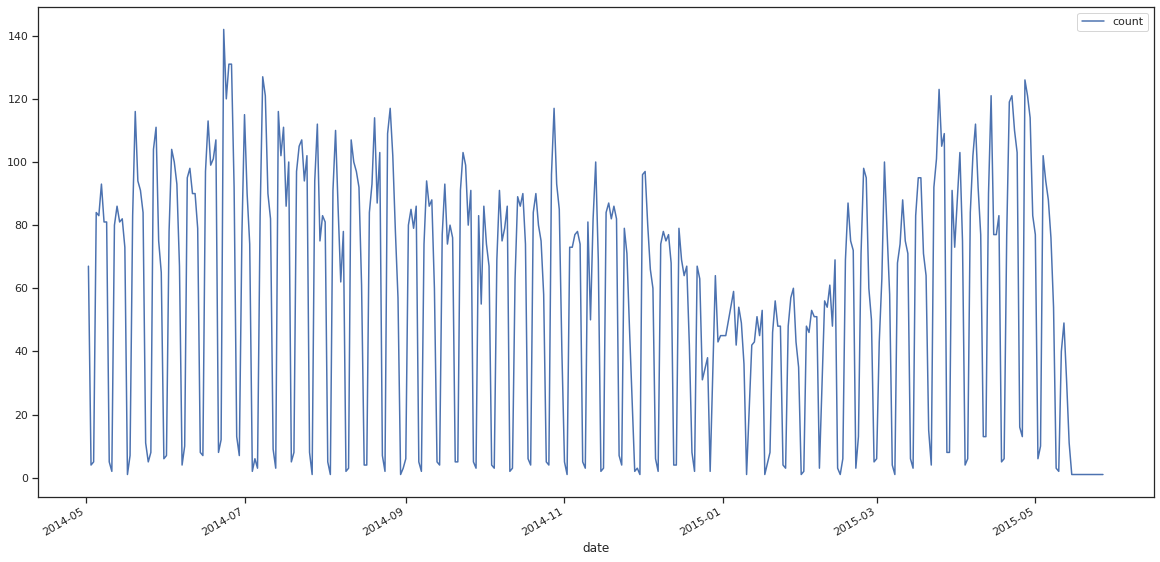

In [ ]:
sales_per_day.plot(figsize=(20,10))

## Szereg fouriera

![fourier series](https://upload.wikimedia.org/wikipedia/commons/7/7e/Fourier_series_sawtooth_wave_circles_animation.gif)

In [ ]:
def generate_fourier_terms(ds, K, P):
    """
    Generates fourier terms for seasonality detection.
    For instance generate_fourier_terms(dataframe, K=[2,3],P=[7,30])
    will create two fourier series terms, one with two componens and period 7,
    an the other one with one component and 10 period length

    @param ds: pandas dataFrame, assumed no missing samples
    @param K: array-like, containing number of series terms for
    @param P: array-like, periods in freq units (7 days, 30 days)
    @return df, colnames: copy of provided ds, with additional fourier series and the list of new colums
                        appended to the model

    """

    t = np.arange(0,len(ds)).reshape(-1,1)
    terms = None
    colnames = []
    for i in range(0,len(K)):
        for tn in range(1,K[i]+1):
            colnames += ['sin_F'+str(i)+"_k"+str(tn),'cos_F'+str(i)+"_k"+str(tn)]
            if terms is None:
                terms = np.hstack((np.sin((2*np.pi*tn*t)/P[i]),np.cos((2*np.pi*tn*t)/P[i])))
            else:
                terms = np.hstack((terms,np.sin((2*np.pi*tn*t)/P[i]),np.cos((2*np.pi*tn*t)/P[i])))

    result =  pd.concat((ds,pd.DataFrame(terms, columns = colnames)), axis=1,ignore_index=True)
    result.columns = list(ds.columns)+colnames
    return result, colnames

In [ ]:
resampled = sales_per_day.copy().resample(rule='D').ffill()

NameError: ignored

In [ ]:
resampled_c = resampled.copy()
resampled_c['prev'] = resampled.shift(1)['count']
resampled_c['prev2'] = resampled.shift(2)['count']
resampled_c['prev3'] = resampled.shift(3)['count']
resampled_c['prev4'] = resampled.shift(4)['count']
resampled = resampled_c.dropna()

In [ ]:
resampled.head()

In [ ]:
result, colnames = generate_fourier_terms(resampled.reset_index(), [4],[7])
colnames.append('prev')
colnames.append('prev2')
colnames.append('prev3')
colnames.append('prev4')

In [ ]:
train, test = train_test_split(result.fillna(0), test_size=0.40, shuffle=False)

In [ ]:
colnames

In [ ]:
model = LinearRegression()
model.fit(train[colnames], train['count'])


In [ ]:
predicted = model.predict(test[colnames])
plt.figure(figsize=(12,9))
plt.plot(predicted)
plt.plot(test['count'].values)
plt.legend(['Predicted','Real'])

## Jak to ogarnąć?
Jak się okazuje mamy sporo rzeczy do zrobienia
  0. Odśmiecenie zbioru danych, feature engineering
  1. Train test split, validation split
  2. Testowanie algorytmów i ich różnych ustawień
  3. Wybór najlepszego modelu
  
Te i więcej kroków można zautomatyzować w pewnym stopniu zautomatyzować (więcej na kolejnych warzatatach).
Dzisiaj zajmiemy się ostatnimi dwoma punktami, czyli wybór najlepszego modelu
  

In [ ]:
from sklearn.model_selection import GridSearchCV

model = Ridge()
rr = GridSearchCV(model, cv=5,param_grid={"alpha": [1e0, 1e1, 1e2, 1e3, 1e4], 'normalize':[True,False],
                                          'solver':[ 'lsqr', 'sparse_cg', 'sag', 'saga']})

train,test = train_test_split(ddf.dropna(), test_size=0.33)
rr.fit(train[features].values.copy(order='C'),train[target].values.copy(order='C'))


In [ ]:
rr.best_estimator_

### CHALLENGE: Porównaj kilka regresorów i narysuj wykres słupkowy porównujący ich mean_squared_error

# Big Challenge
Zbuduj model regresji dla zbioru w pliku bikes_train.csv podlinkowanych na Pegazie